In [1]:
import os.path
import matplotlib.pyplot as plt
import numpy as np

from dataReader import *
from ACO import *
from Elite import *
from Greedy import *
from MMAS import *

In [2]:
file_names = ['E-n22-k4.vrp', 'E-n23-k3.vrp', 'E-n30-k3.vrp', 'E-n33-k4.vrp', 'E-n51-k5.vrp', 'E-n76-k7.vrp', 'E-n76-k8.vrp']
file_path = '/home/piotr/PycharmProjects/ants/Ants/data/Vrp-Set-E/E/'

best_aco_tab = []
best_elite_tab = []
best_mmas_tab = []
best_greedy_tab = []

iterations_aco_tab = []
iterations_elite_tab = []
iterations_mmas_tab = []

last_aco_tab = []
last_elite_tab = []
last_mmas_tab = []

for file_name in file_names:
    path = os.path.join(file_path, file_name)
    number_of_trucks, optimal_value, capacity, depot, customer_table = read_vrp_file(path)

    # ACO parameters
    num_ants = 3 * number_of_trucks
    alpha = 0.8
    beta = 0.7
    evaporation_rate = 0.2
    num_iterations = 1000
    max_distance = (optimal_value/number_of_trucks) * 2

    # Elitist Ant System parameters
    elitism_factor = 5.0  # A higher value gives more weight to the best solution

    best_solution_aco, best_distance_aco, distance_table_aco, last_aco = ant_colony_optimization(
        depot, customer_table, capacity, max_distance, num_ants, alpha, beta, evaporation_rate, num_iterations, optimal_value
    )
    best_aco_tab.append(best_distance_aco)
    iterations_aco_tab.append(distance_table_aco)
    last_aco_tab.append(last_aco)

    best_solution_elite, best_distance_elite, distance_table_elite, last_elite = elitist_ant_system(
        depot, customer_table, capacity, max_distance, num_ants, alpha, beta, evaporation_rate, num_iterations, elitism_factor, optimal_value
    )
    best_elite_tab.append(best_distance_elite)
    iterations_elite_tab.append(distance_table_elite)
    last_elite_tab.append(last_elite)

    best_solution_mmas, best_distance_mmas, distance_table_mmas, last_mmas = max_min_ant_system(
        depot, customer_table, capacity, max_distance, num_ants, alpha, beta, evaporation_rate, num_iterations, optimal_value
    )
    best_mmas_tab.append(best_distance_mmas)
    iterations_mmas_tab.append(distance_table_mmas)
    last_mmas_tab.append(last_mmas)

    best_solution_greedy, best_distance_greedy = greedy_algorithm(depot, customer_table, capacity, max_distance)
    best_greedy_tab.append(best_distance_greedy)

Iteration 1: Best distance = 543.86
Iteration 2: Best distance = 543.86
Iteration 3: Best distance = 543.86
Iteration 4: Best distance = 543.86
Iteration 5: Best distance = 543.86
Iteration 6: Best distance = 543.86
Iteration 7: Best distance = 543.86
Iteration 8: Best distance = 543.86
Iteration 9: Best distance = 543.86
Iteration 10: Best distance = 543.86
Iteration 11: Best distance = 543.86
Iteration 12: Best distance = 543.86
Iteration 13: Best distance = 543.86
Iteration 14: Best distance = 543.86
Iteration 15: Best distance = 543.86
Iteration 16: Best distance = 543.86
Iteration 17: Best distance = 543.86
Iteration 18: Best distance = 543.86
Iteration 19: Best distance = 543.86
Iteration 20: Best distance = 543.86
Iteration 21: Best distance = 543.86
Iteration 22: Best distance = 543.86
Iteration 23: Best distance = 543.86
Iteration 24: Best distance = 543.86
Iteration 25: Best distance = 507.17
Iteration 26: Best distance = 507.17
Iteration 27: Best distance = 507.17
Iteration 

In [3]:
print(best_aco_tab)
print(best_elite_tab)
print(best_mmas_tab)
print(best_greedy_tab)

[434.30384478045613, 633.3889391922016, 619.1733655250628, 950.9434452200401, 746.0303652796937, 1022.0160165519712, 1120.9230564250856]
[405.5803514806653, 583.994669070257, 573.8263973299706, 942.947467031843, 724.4589177557058, 1023.945826048098, 1105.5071935581218]
[426.4761195244808, 647.1497246659825, 626.6999873453175, 1000.6105300853196, 784.866172766125, 1108.2990876940323, 1221.6696791565412]
[589.4211147764399, 746.7344337908839, 639.6936366530506, 1002.189802152025, 794.8376279033174, 1070.1896637874615, 1029.7070321445078]


False

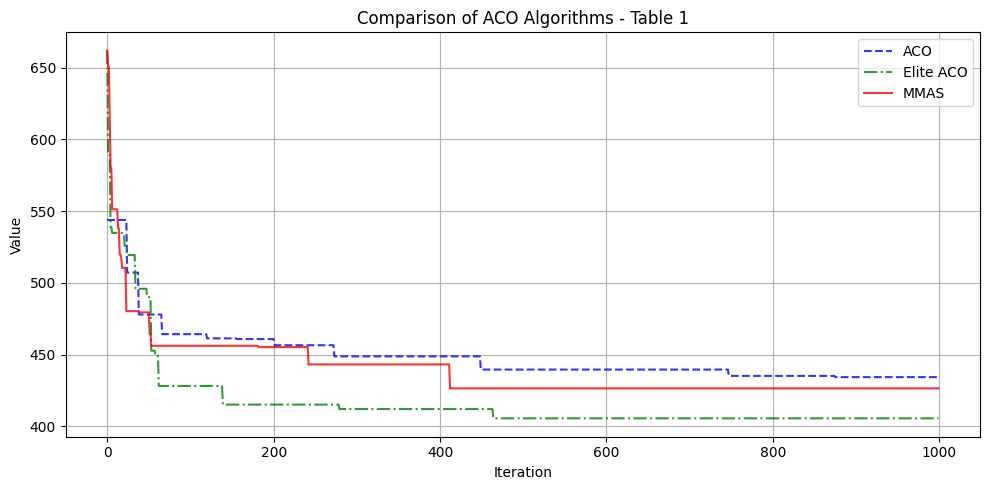

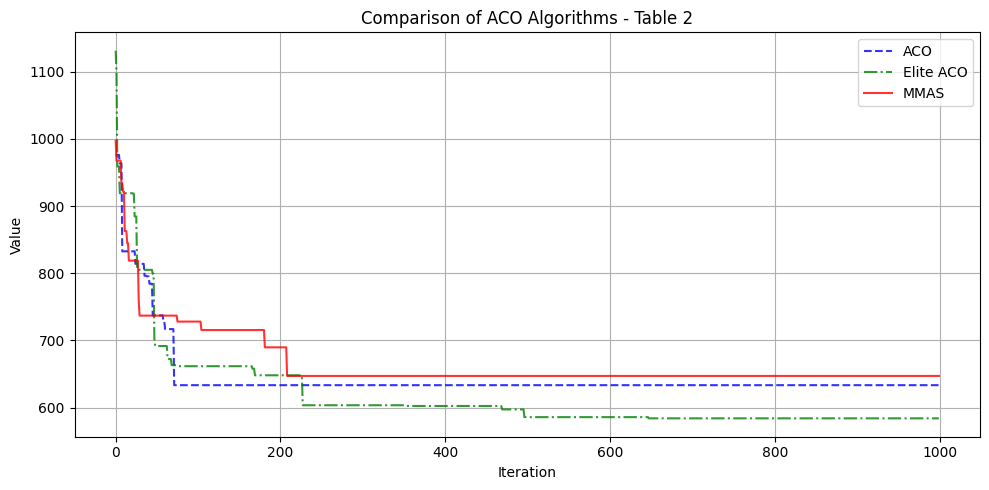

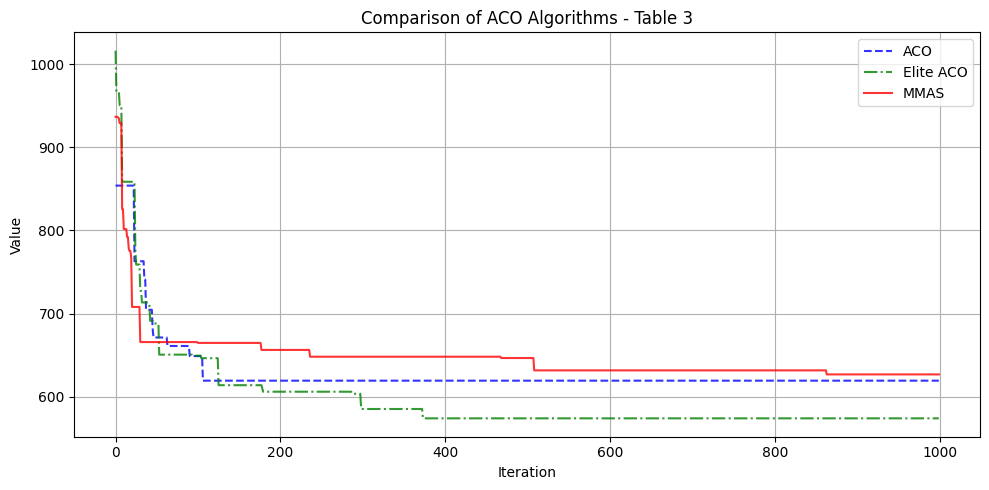

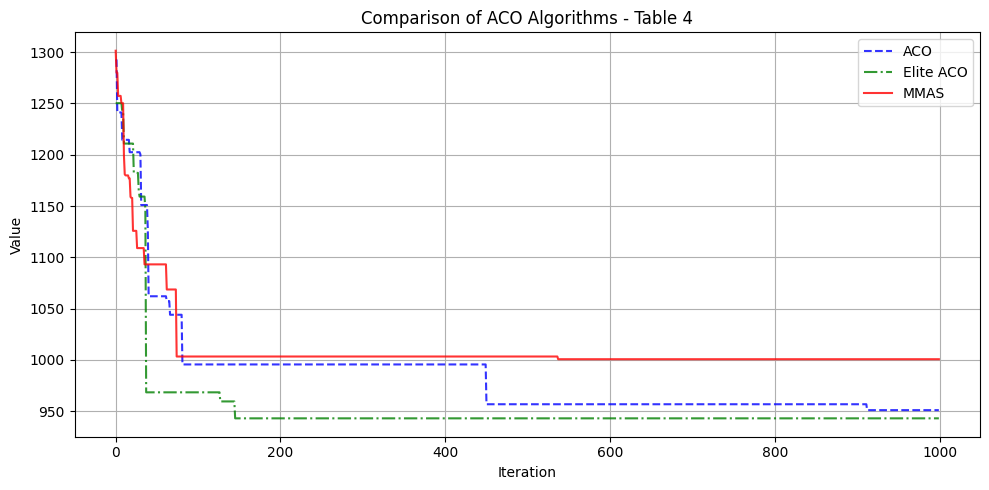

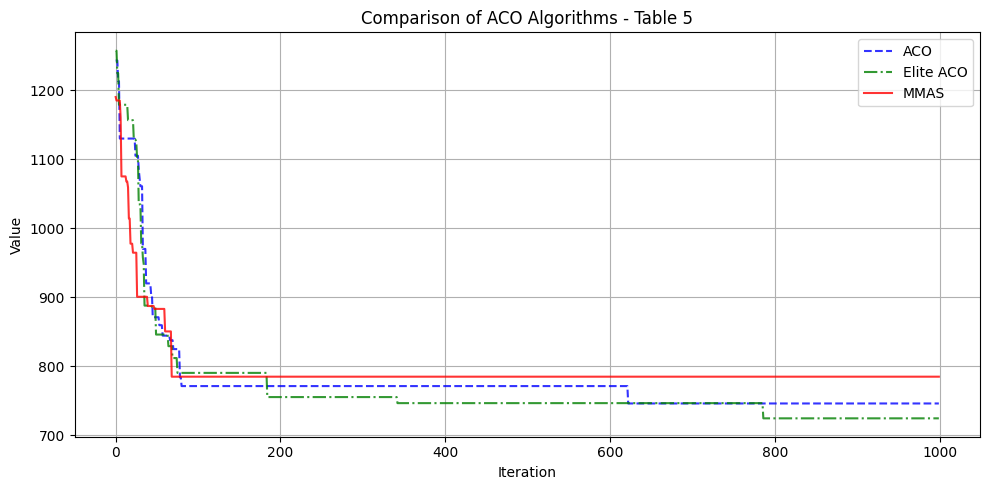

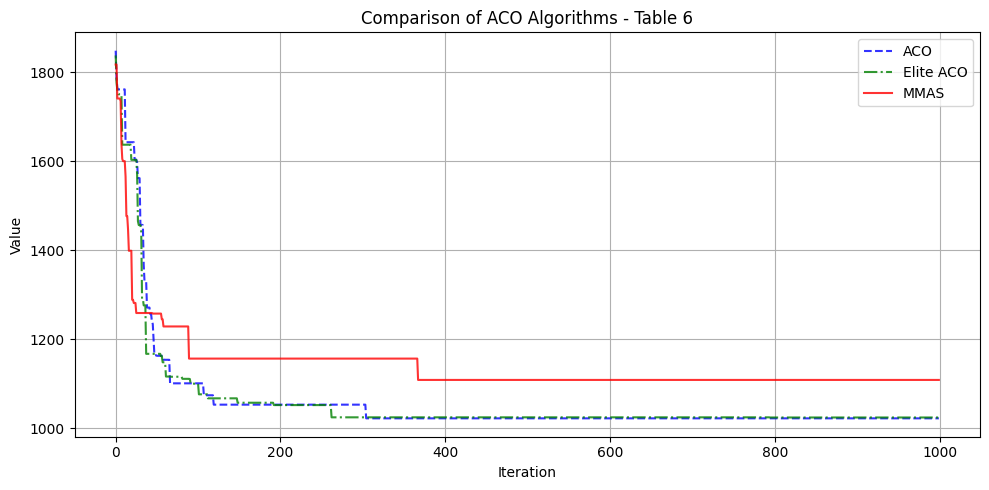

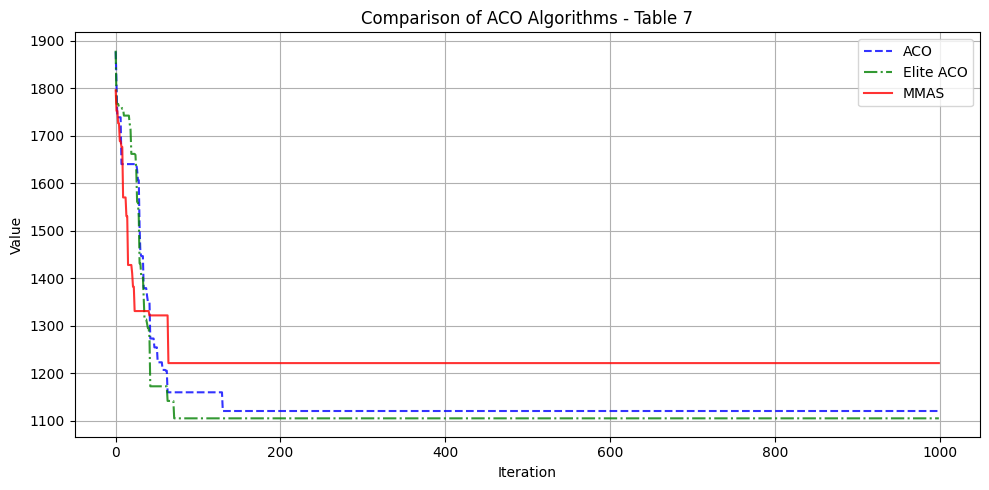

In [4]:
for i in range(7):
    plt.figure(figsize=(10, 5))

    # Plot each algorithm with different style
    plt.plot(iterations_aco_tab[i], label='ACO', color='blue', linestyle='--', alpha=0.8)
    plt.plot(iterations_elite_tab[i], label='Elite ACO', color='green', linestyle='-.', alpha=0.8)
    plt.plot(iterations_mmas_tab[i], label='MMAS', color='red', linestyle='-', alpha=0.8)

    plt.title(f'Comparison of ACO Algorithms - Table {i+1}')
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Uncomment this if MMAS dwarfs other lines
    # plt.yscale('log')

    plt.show()

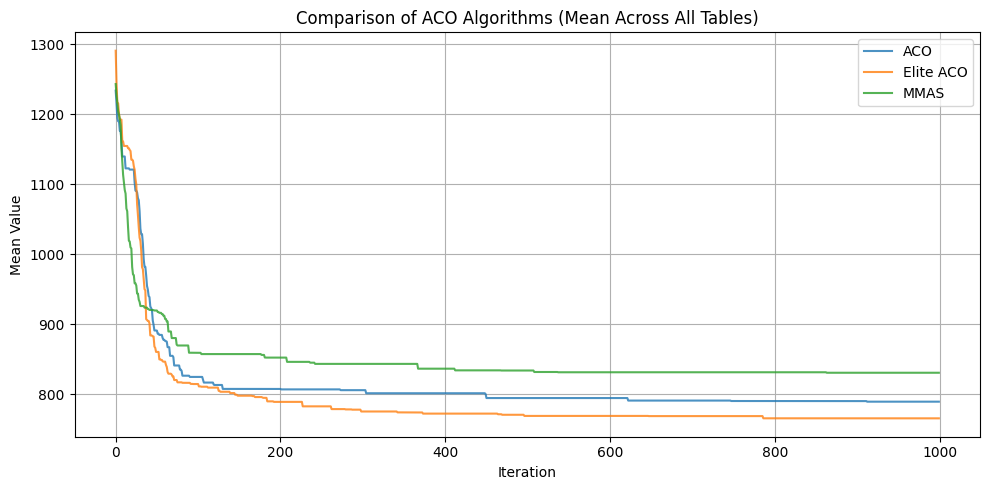

In [5]:
# Compute the mean across all tables for each algorithm
mean_aco = np.mean(iterations_aco_tab, axis=0)
mean_elite = np.mean(iterations_elite_tab, axis=0)
mean_mmas = np.mean(iterations_mmas_tab, axis=0)

# Plot the means
plt.figure(figsize=(10, 5))
plt.plot(mean_aco, label='ACO', alpha=0.8)
plt.plot(mean_elite, label='Elite ACO', alpha=0.8)
plt.plot(mean_mmas, label='MMAS', alpha=0.8)

plt.title('Comparison of ACO Algorithms (Mean Across All Instances)')
plt.xlabel('Iteration')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

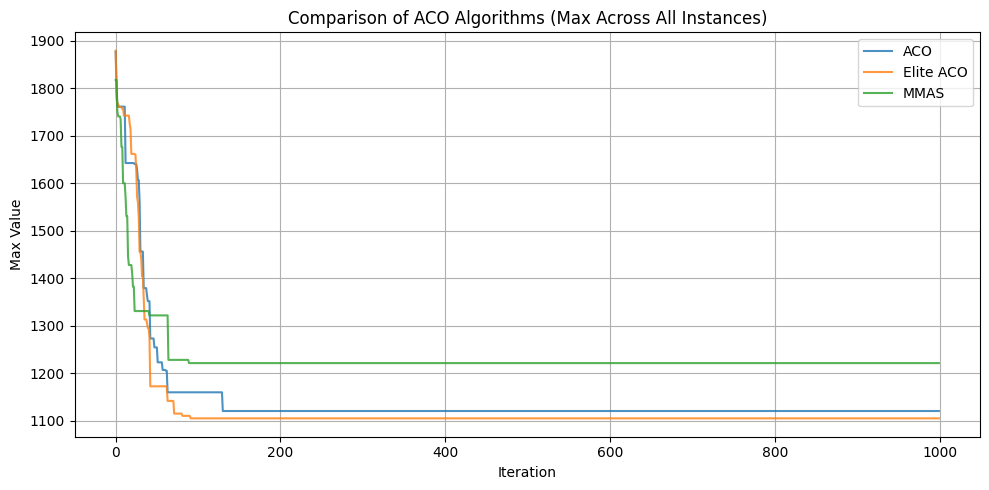

In [13]:
# Compute the mean across all tables for each algorithm
mean_aco = np.max(iterations_aco_tab, axis=0)
mean_elite = np.max(iterations_elite_tab, axis=0)
mean_mmas = np.max(iterations_mmas_tab, axis=0)

# Plot the means
plt.figure(figsize=(10, 5))
plt.plot(mean_aco, label='ACO', alpha=0.8)
plt.plot(mean_elite, label='Elite ACO', alpha=0.8)
plt.plot(mean_mmas, label='MMAS', alpha=0.8)

plt.title('Comparison of ACO Algorithms (Max Across All Instances)')
plt.xlabel('Iteration')
plt.ylabel('Max Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

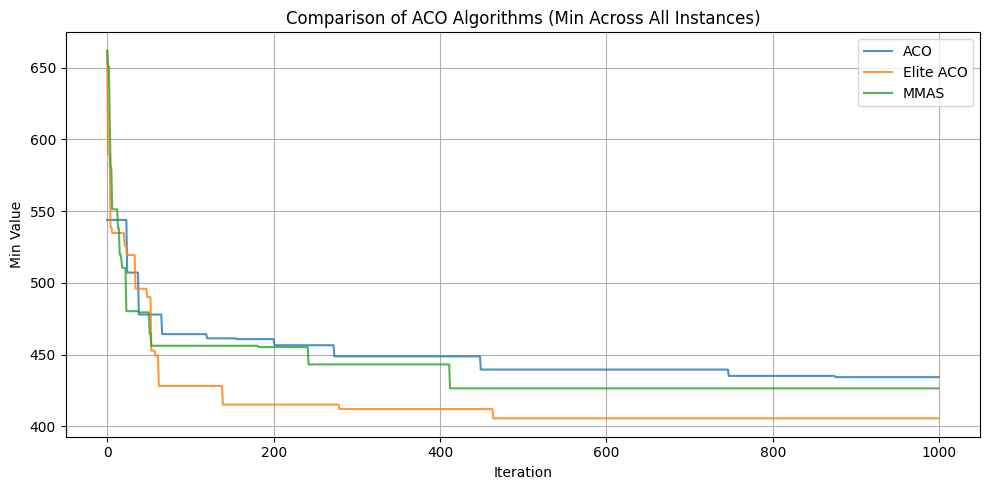

In [14]:
# Compute the mean across all tables for each algorithm
mean_aco = np.min(iterations_aco_tab, axis=0)
mean_elite = np.min(iterations_elite_tab, axis=0)
mean_mmas = np.min(iterations_mmas_tab, axis=0)

# Plot the means
plt.figure(figsize=(10, 5))
plt.plot(mean_aco, label='ACO', alpha=0.8)
plt.plot(mean_elite, label='Elite ACO', alpha=0.8)
plt.plot(mean_mmas, label='MMAS', alpha=0.8)

plt.title('Comparison of ACO Algorithms (Min Across All Instances)')
plt.xlabel('Iteration')
plt.ylabel('Min Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
print(last_aco)
print(last_elite)
print(last_mmas)

130
71
64


In [12]:
print(last_aco_tab)
print(last_elite_tab)
print(last_mmas_tab)

print(np.mean(last_aco_tab))
print(np.mean(last_elite_tab))
print(np.mean(last_mmas_tab))

print(np.max(last_aco_tab))
print(np.max(last_elite_tab))
print(np.max(last_mmas_tab))

print(np.min(last_aco_tab))
print(np.min(last_elite_tab))
print(np.min(last_mmas_tab))

[875, 71, 106, 912, 622, 304, 130]
[464, 723, 373, 145, 786, 794, 71]
[412, 208, 863, 537, 68, 367, 64]
431.42857142857144
479.42857142857144
359.85714285714283
912
794
863
71
71
64


In [15]:
print(best_aco_tab)
print(best_elite_tab)
print(best_mmas_tab)
print(best_greedy_tab)

print(np.mean(best_aco_tab))
print(np.mean(best_elite_tab))
print(np.mean(best_mmas_tab))
print(np.mean(best_greedy_tab))

print(np.max(best_aco_tab))
print(np.max(best_elite_tab))
print(np.max(best_mmas_tab))
print(np.max(best_greedy_tab))

print(np.min(best_aco_tab))
print(np.min(best_elite_tab))
print(np.min(best_mmas_tab))
print(np.min(best_greedy_tab))

[434.30384478045613, 633.3889391922016, 619.1733655250628, 950.9434452200401, 746.0303652796937, 1022.0160165519712, 1120.9230564250856]
[405.5803514806653, 583.994669070257, 573.8263973299706, 942.947467031843, 724.4589177557058, 1023.945826048098, 1105.5071935581218]
[426.4761195244808, 647.1497246659825, 626.6999873453175, 1000.6105300853196, 784.866172766125, 1108.2990876940323, 1221.6696791565412]
[589.4211147764399, 746.7344337908839, 639.6936366530506, 1002.189802152025, 794.8376279033174, 1070.1896637874615, 1029.7070321445078]
789.5398618535016
765.7515460392375
830.8244716053998
838.9676158868123
1120.9230564250856
1105.5071935581218
1221.6696791565412
1070.1896637874615
434.30384478045613
405.5803514806653
426.4761195244808
589.4211147764399
